# **SMART PHONES COST RECOGNITION AND PREDICTION MODEL**

Objective
1) To predict price range of the mobile for test data
2) To check the accuracy of the classifiers Decision tree,Logistic Regression classifier,K- Nearest Neighbor, Random forest model, Decision tree and K nearest neighbor.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Importing Datasets



In [2]:
url = 'https://drive.google.com/file/d/1-h4tZ9r2JIdHZscuhipjgxFeuWoXsZ1f/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data_train = pd.read_csv(path)

In [3]:
url = 'https://drive.google.com/file/d/1lSuI1kNXZo7pzx3JJ6X5NvTCEgnBBLz5/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data_test = pd.read_csv(path)

# Descripation of Datasets:
Dataset as 21 features and 2000 entries. The meanings of the features are given below.

battery_power: Total energy a battery can store in one time measured in mAh
blue: Has bluetooth or not
clock_speed: speed at which microprocessor executes instructions
dual_sim: Has dual sim support or not
fc: Front Camera mega pixels
four_g: Has 4G or not
int_memory: Internal Memory in Gigabytes
m_dep: Mobile Depth in cm
mobile_wt: Weight of mobile phone
n_cores: Number of cores of processor
pc: Primary Camera mega pixels
px_height: Pixel Resolution Height
px_width: Pixel Resolution Width
ram: Random Access Memory in Mega Byte
sc_h: Screen Height of mobile in cm
sc_w: Screen Width of mobile in cm
talk_time: longest time that a single battery charge will last when you are
three_g: Has 3G or not
touch_screen: Has touch screen or not
wifi: Has wifi or not
price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

Dataset with Price Range (Target Variable) 

In [ ]:
data_test.head()

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1             0     0  
2         10        0             1     1  
3          7        1             1     0  
4          7        1             0     1  

[5 rows x 21 columns]

# Exploratory Data Analysis

In [ ]:
data_train.shape

(2000, 21)

In [ ]:
data_test.shape

(1000, 21)

In [ ]:
data_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [ ]:
for col in data_train.columns:
    print("{} have {} unique values: ".format(col, data_train[col].nunique()))
print("*" * 35)
for col in data_train.columns:
    if data_train[col].nunique() <= 16:
        print("{}: {}".format(col, data_train[col].unique()))

battery_power have 1094 unique values: 
blue have 2 unique values: 
clock_speed have 26 unique values: 
dual_sim have 2 unique values: 
fc have 20 unique values: 
four_g have 2 unique values: 
int_memory have 63 unique values: 
m_dep have 10 unique values: 
mobile_wt have 121 unique values: 
n_cores have 8 unique values: 
pc have 21 unique values: 
px_height have 1137 unique values: 
px_width have 1109 unique values: 
ram have 1562 unique values: 
sc_h have 15 unique values: 
sc_w have 19 unique values: 
talk_time have 19 unique values: 
three_g have 2 unique values: 
touch_screen have 2 unique values: 
wifi have 2 unique values: 
price_range have 4 unique values: 
***********************************
blue: [0 1]
dual_sim: [0 1]
four_g: [0 1]
m_dep: [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
n_cores: [2 3 5 6 1 8 4 7]
sc_h: [ 9 17 11 16  8 13 19  5 14 18  7 10 12  6 15]
three_g: [0 1]
touch_screen: [0 1]
wifi: [1 0]
price_range: [1 2 3 0]


Checking Datasets to be Cleaned (checking null values in data)

In [ ]:
data_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
data_test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [ ]:
data_train.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

# Data Visualization

1) Correlation between features



<AxesSubplot:>

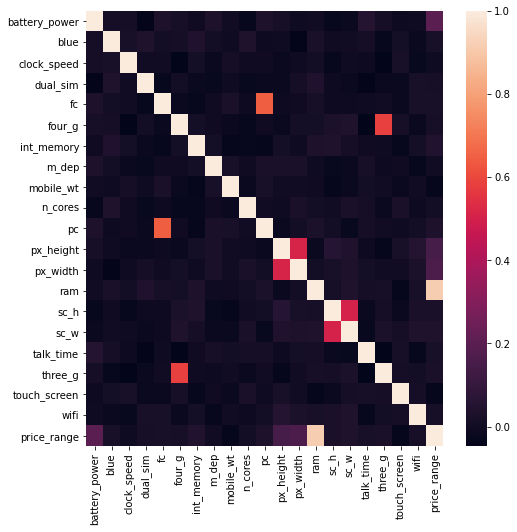

In [ ]:
plt.figure(figsize=(8,8))
sb.heatmap(data_train.corr())

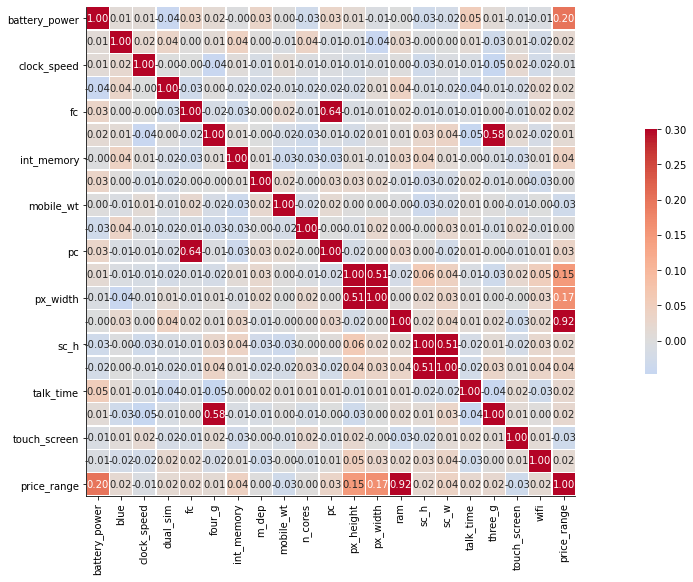

In [ ]:
corr = data_train.corr()
g = sb.heatmap(corr, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sb.despine()
g.figure.set_size_inches(25,9)
plt.show()

As we can see that target price range has highly positive correlation between ram. And also battery power have good realtion,4G and 3G have good relation,px_height and px_width have good relation.

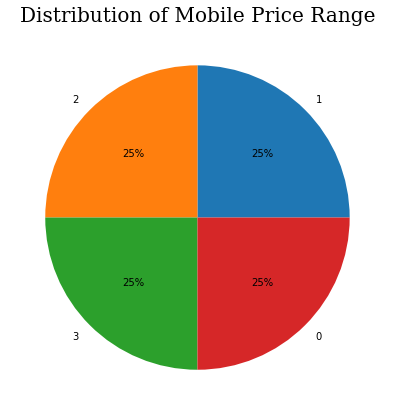

In [ ]:
a = ((data_train['price_range'] == 0).sum() / data_train['price_range'].count() * 100), ((data_train['price_range'] == 1).sum() / data_train['price_range'].count() * 100), ((data_train['price_range'] == 2).sum() / data_train['price_range'].count() * 100), ((data_train['price_range'] == 3).sum() / data_train['price_range'].count() * 100)
font1 = {'family':'serif','color':'black','size':20}
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(a, labels = data_train['price_range'].unique(),explode = [0, 0, 0, 0], autopct='%1.0f%%')
plt.title("Distribution of Mobile Price Range", fontdict = font1)
plt.show()

# Visualizing Correlated Data

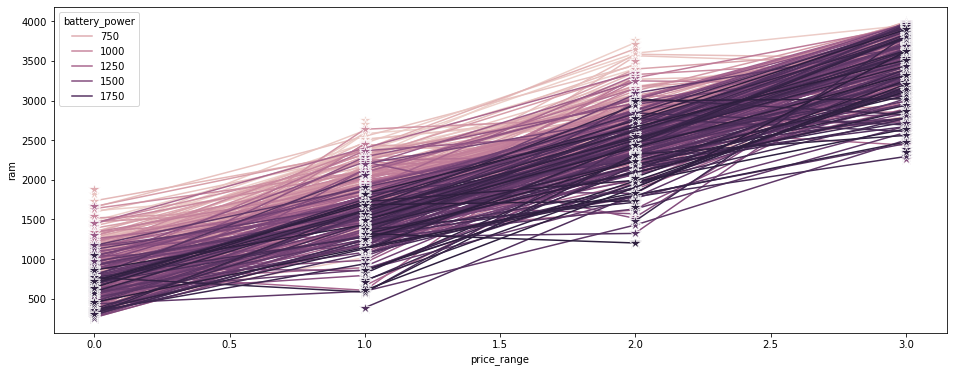

In [ ]:
plt.figure(figsize=[16, 6])
sb.lineplot(x="price_range", y="ram", data=data_train, hue='battery_power', marker = '*', ms=13, ci=None)
plt.show()

In [4]:
import plotly.express as px
fig = px.scatter_3d(data_train.head(1000), x='ram', y='battery_power', z='px_width', color='price_range')
fig.show()

<AxesSubplot:title={'center':'ram is the best featture to separate the price ranges'}, xlabel='ram', ylabel='Density'>

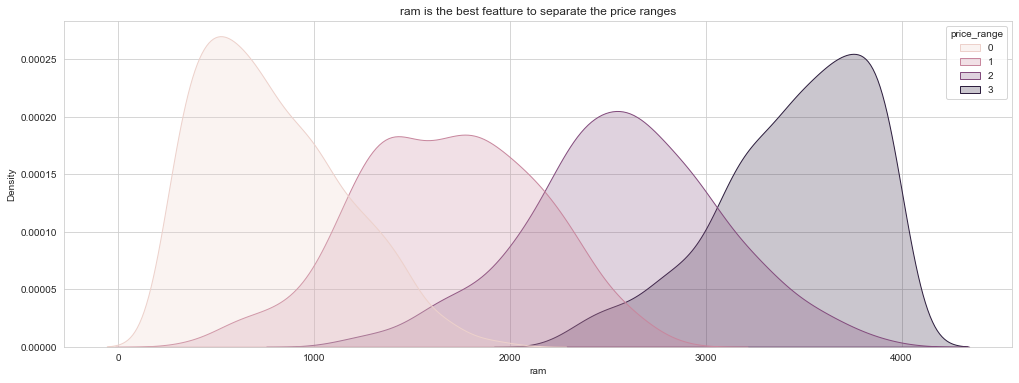

In [ ]:
plt.figure(figsize=(17,6))
sb.set_style("whitegrid")
plt.title('ram is the best featture to separate the price ranges')
sb.kdeplot(data=data_train, x='ram',hue='price_range', shade=True)

2) Histograms

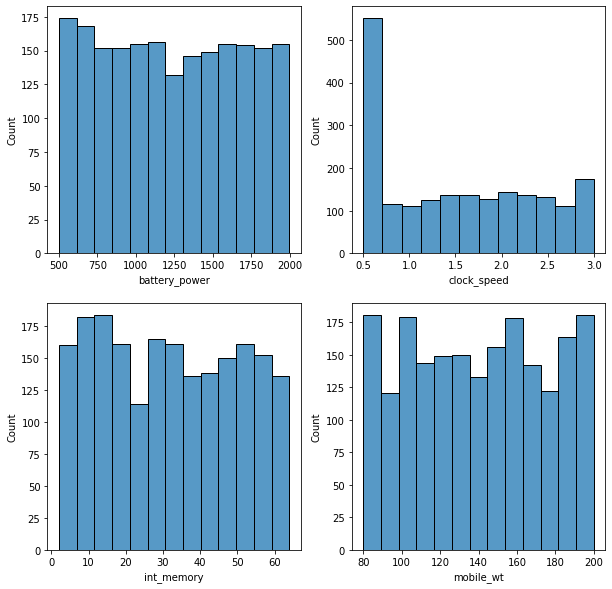

In [5]:
col=["battery_power","clock_speed","int_memory","mobile_wt"]
plt.figure(figsize=(10,10))
i=1
k=0
for j in col:
    if i!=5:
        plt.subplot(2,2,i)
        sb.histplot(data_train[col[k]])
        k=k+1
    else:
        break
    i=i+1

3) CountPlot

E:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range', ylabel='count'>

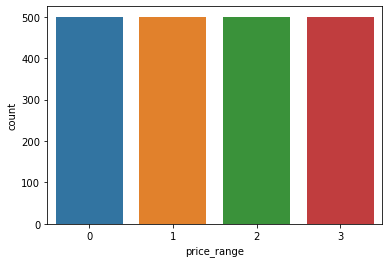

In [ ]:
sb.countplot(data_train['price_range'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

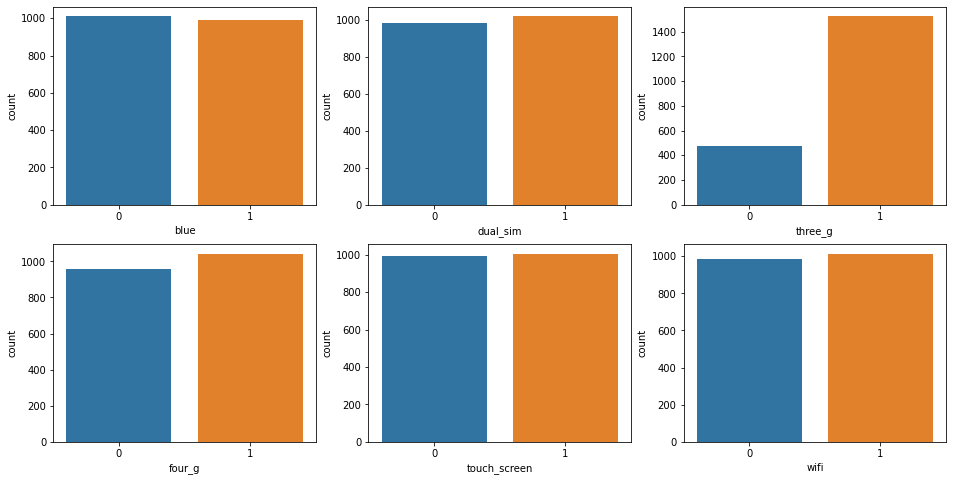

In [6]:
col=['blue',"dual_sim","three_g","four_g","touch_screen",'wifi']
plt.figure(figsize=(16,8))
i=1
k=0
for j in col:
    if i!=7:
        plt.subplot(2,3,i)
        sb.countplot(data_train[col[k]])
        k=k+1
    else:
        break
    i=i+1

4) Scatter plot

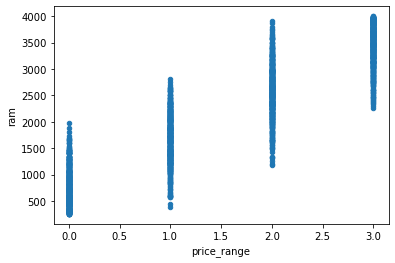

In [ ]:
data_train.plot(x='price_range',y='ram',kind='scatter')
plt.show()


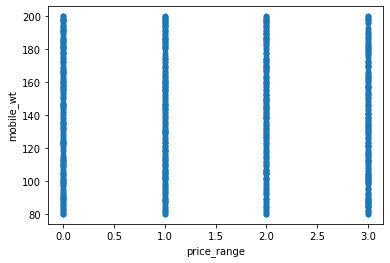

In [ ]:
data_train.plot(x='price_range',y='mobile_wt',kind='scatter')
plt.show()

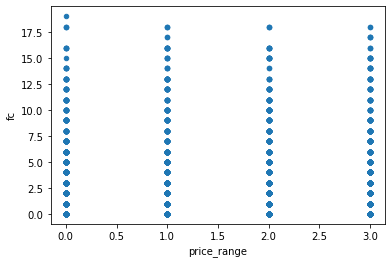

In [ ]:
data_train.plot(x='price_range',y='fc',kind='scatter')
plt.show()

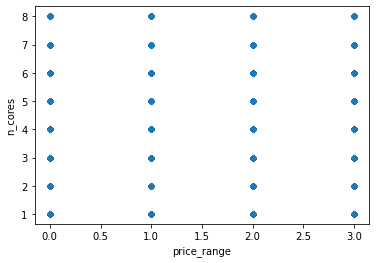

In [ ]:
data_train.plot(x='price_range',y='n_cores',kind='scatter')
plt.show()

5) Pie Plot for 4G and 3G phones

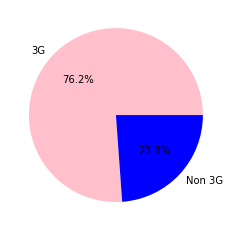

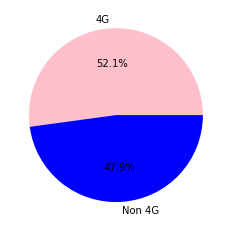

In [ ]:
plt.subplot=(1,2,1)
values=data_train['three_g'].value_counts().values
labels=["3G","Non 3G"]
col=["pink","blue"]
plt.pie(values,labels=labels,colors=col,autopct='%1.1f%%')
plt.show()

plt.subplot=(1,2,2)
values=data_train['four_g'].value_counts().values
labels=["4G","Non 4G"]
col=["pink","blue"]
plt.pie(values,labels=labels,colors=col,autopct='%1.1f%%')
plt.show()

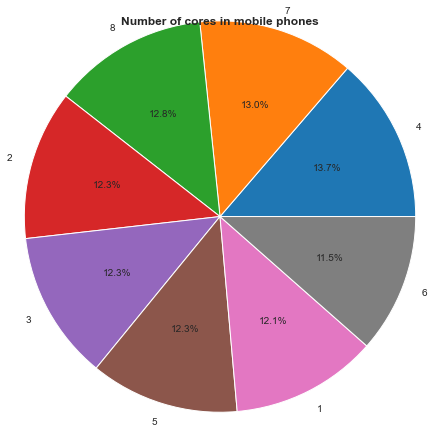

In [ ]:
n_cores = data_train['n_cores'].value_counts()
plt.title('Number of cores in mobile phones\n\n', weight='bold')
n_cores.plot.pie(autopct="%.1f%%", radius=1.5)
plt.show()

6) Bar Plot

E:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dual_sim', ylabel='price_range'>

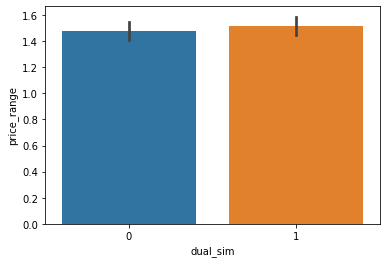

In [ ]:
sb.barplot(data_train['dual_sim'],data_train['price_range'])

E:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wifi', ylabel='price_range'>

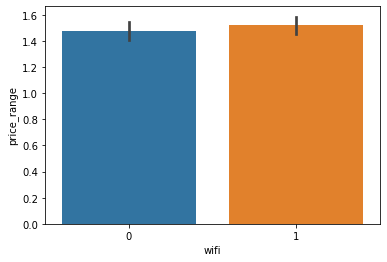

In [ ]:
sb.barplot(data_train['wifi'],data_train['price_range'])

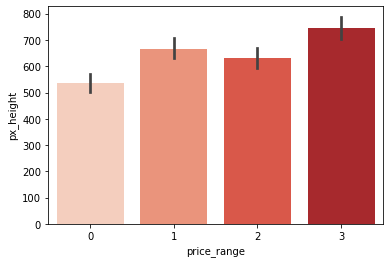

In [ ]:
sb.barplot(x='price_range',y='px_height',data=data_train,palette="Reds")
plt.show()

<AxesSubplot:xlabel='price_range', ylabel='px_width'>

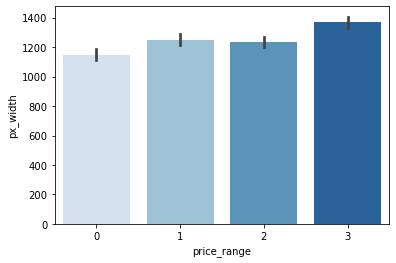

In [ ]:
sb.barplot(x="price_range",y='px_width',data=data_train,palette='Blues')

7) Box Plot

E:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

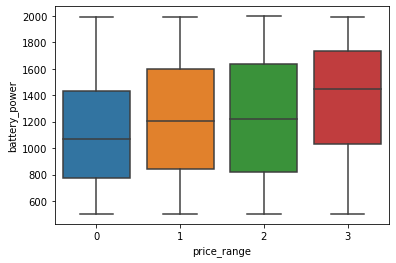

In [ ]:
sb.boxplot(data_train['price_range'],data_train['battery_power'])

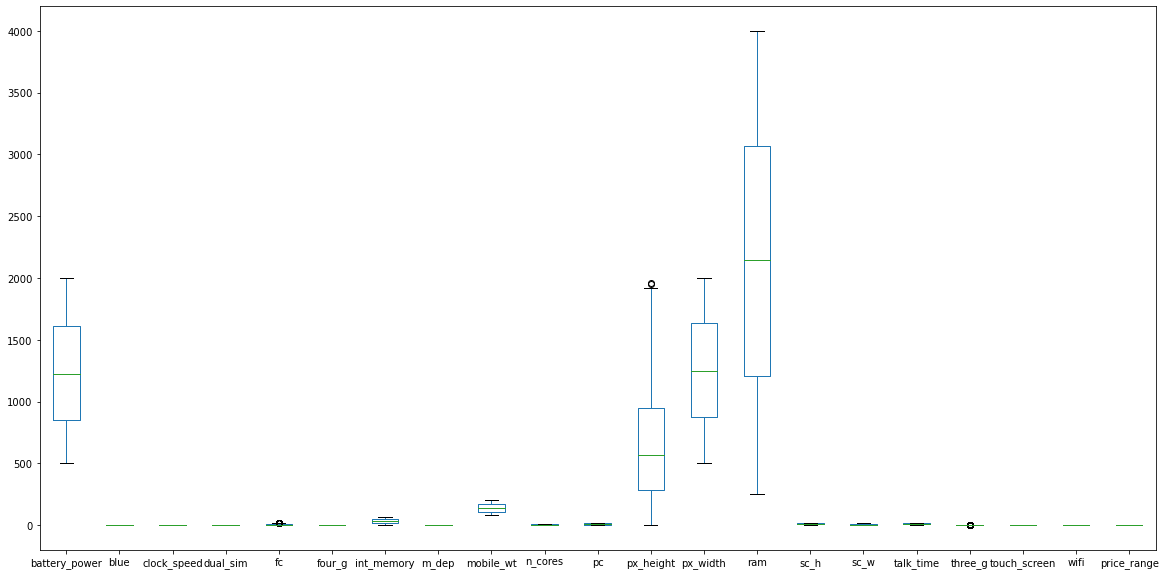

In [ ]:
data_train.plot(kind='box',figsize=(20,10))
plt.show()

In [ ]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [5]:
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.figure_factory as ff

In [6]:
px.box(data_train,color="price_range")

In [7]:
px.box(data_train,x ="ram" ,color="price_range")

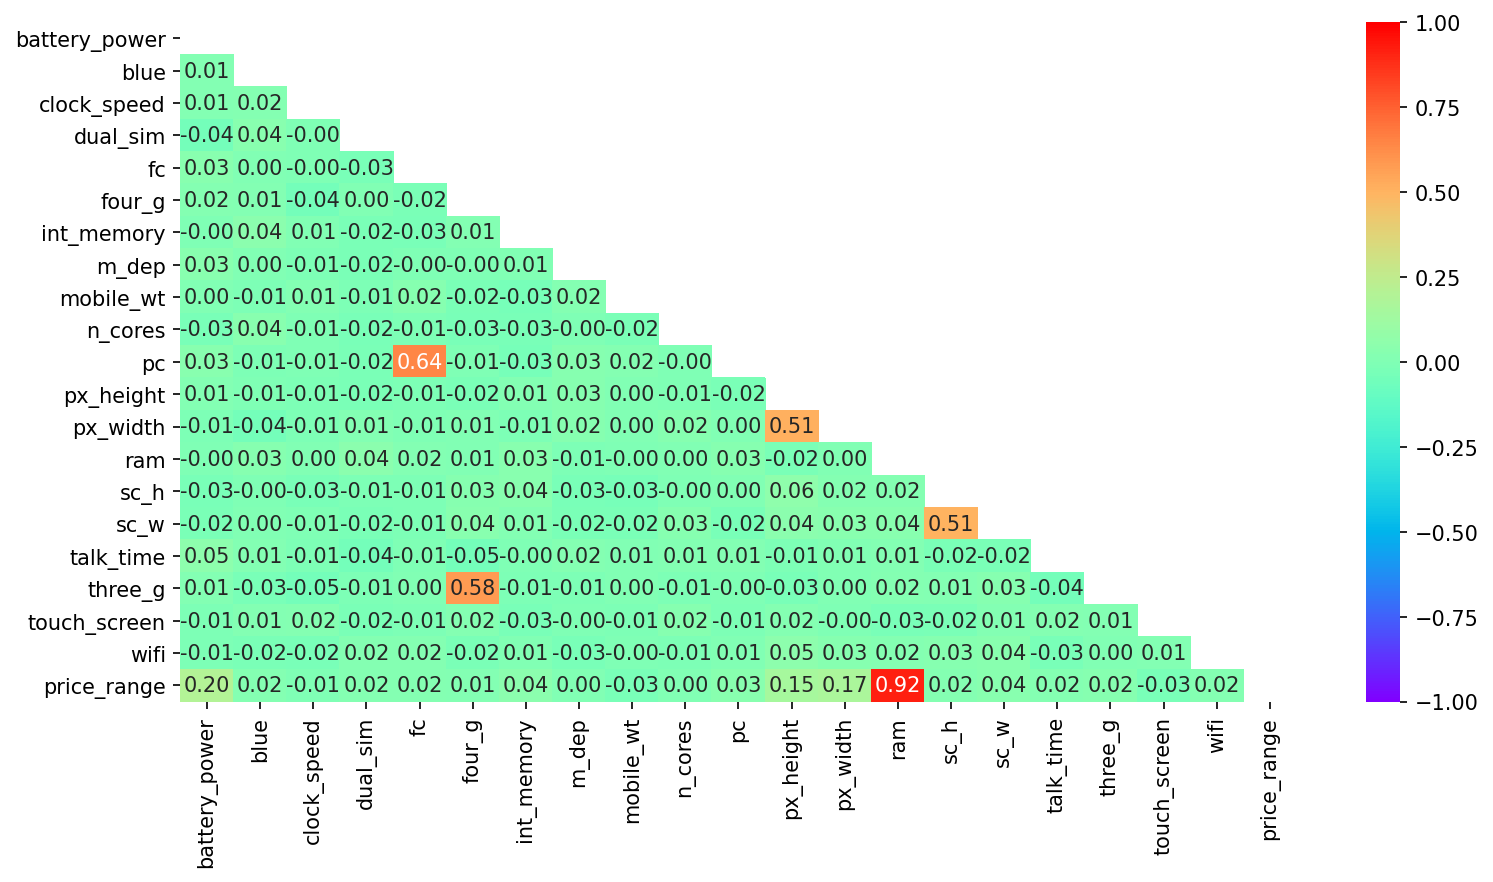

In [ ]:
matrix =np.triu(data_train.corr())
fig,ax =plt.subplots(figsize=(12,6),dpi=150)
sb.heatmap(data_train.corr(),vmax=1,vmin=-1,center=0,annot=True,fmt=".2f",mask=matrix,ax=ax,cmap="rainbow");

 Configuring Data

In [8]:
X=data_train.drop('price_range',axis=1)

In [14]:
X

battery_power  blue  clock_speed  ...  three_g  touch_screen  wifi
0               842     0          2.2  ...        0             0     1
1              1021     1          0.5  ...        1             1     0
2               563     1          0.5  ...        1             1     0
3               615     1          2.5  ...        1             0     0
4              1821     1          1.2  ...        1             1     0
...             ...   ...          ...  ...      ...           ...   ...
1995            794     1          0.5  ...        1             1     0
1996           1965     1          2.6  ...        1             1     1
1997           1911     0          0.9  ...        1             1     0
1998           1512     0          0.9  ...        1             1     1
1999            510     1          2.0  ...        1             1     1

[2000 rows x 20 columns]

In [ ]:
data_test.shape

(1000, 21)

In [15]:
data_test=data_test.drop('id',axis=1)

In [16]:
data_test.head()

battery_power  blue  clock_speed  ...  three_g  touch_screen  wifi
0           1043     1          1.8  ...        0             1     0
1            841     1          0.5  ...        1             0     0
2           1807     1          2.8  ...        0             1     1
3           1546     0          0.5  ...        1             1     0
4           1434     0          1.4  ...        1             0     1

[5 rows x 20 columns]

In [ ]:
data_test.shape

(1000, 20)

In [9]:
Y=data_train['price_range']

In [18]:
Y.unique()

array([1, 2, 3, 0])

# **Training The Model**

Splitting data into dependent variable and independent variable

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [12]:
X_train

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
816             805     1          0.7         0   0       0          64   
790             911     1          2.9         0   0       0          46   
361             899     0          0.5         1  13       1          57   
592            1263     0          0.5         0  12       0          64   
...             ...   ...          ...       ...  ..     ...         ...   
1791           1203     1          0.5         1   0       1          11   
1096           1154     0          2.0         0   6       1          35   
1932            718     1          1.6         1   1       1          30   
235            1523     1          1.8         0   6       1          11   
1061           1522     1          0.7         1   4       0          28   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2   2         20       756  2549     9     7   
816     0.1         97        4  14        641       704   418    11     6   
790     0.1        181        5   1        461       670   363     9     5   
361     0.9        172        2  18        788      1331   364    11     1   
592     0.3        175        5  18        178      1883  1183    14     3   
...     ...        ...      ...  ..        ...       ...   ...   ...   ...   
1791    0.9        109        2  12         35       510  1672    17    13   
1096    0.8        159        5  16       1003      1827  3262    16    15   
1932    0.4         93        3  12        662       997  1601    10     9   
235     0.1        129        1   8        148      1606   707    19     8   
1061    0.2        124        1   5        952      1191  1368    14     5   

      talk_time  three_g  touch_screen  wifi  
0            19        0             0     1  
816          17        0             1     1  
790          17        0             1     0  
361           7        1             1     0  
592          17        0             0     1  
...         ...      ...           ...   ...  
1791         19        1             1     0  
1096         16        1             0     0  
1932         12        1             1     1  
235          19        1             1     0  
1061         17        1             0     1  

[1600 rows x 20 columns]

In [ ]:
Y_train

0       1
816     0
790     0
361     0
592     1
       ..
1791    0
1096    3
1932    1
235     0
1061    1
Name: price_range, Length: 1600, dtype: int64

In [ ]:
X_test

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
674            1034     0          2.6         1   2       1          45   
1699           1002     1          1.8         0   1       0          45   
1282            609     1          0.5         0   4       1          10   
1315           1510     0          0.6         1   1       0          32   
1210            805     1          1.7         1   0       1          58   
...             ...   ...          ...       ...  ..     ...         ...   
400            1266     0          1.9         1   0       1           7   
763            1741     1          1.8         0   0       0          14   
385            1880     1          1.8         0   4       1          18   
1667           1967     0          0.5         0   0       1          46   
1820            665     1          0.7         0   0       1          31   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
674     0.3        190        3   4        182      1293   969    15     1   
1699    0.7        180        7   7        948      1007  1234    19    13   
1282    0.1         81        6   6        113      1524  1905    16     3   
1315    0.7        135        3   8        963      1520   854     8     2   
1210    0.9        168        3  10         81      1544  3397     7     6   
...     ...        ...      ...  ..        ...       ...   ...   ...   ...   
400     0.2        184        3  12        346      1468  2532    10     5   
763     0.7        143        8   0        730      1895  3387    11     3   
385     0.7        138        3   5         71       699  3333    17    15   
1667    0.6        199        1   7        518      1374  1567    15     2   
1820    0.1        185        5   2        496      1804   690     5     2   

      talk_time  three_g  touch_screen  wifi  
674           7        1             0     0  
1699         18        1             1     0  
1282         18        1             1     1  
1315         10        1             0     1  
1210          2        1             0     0  
...         ...      ...           ...   ...  
400           4        1             1     1  
763           3        1             0     0  
385           7        1             0     0  
1667          7        1             1     0  
1820         15        1             0     0  

[400 rows x 20 columns]

In [ ]:
Y_test

674     0
1699    0
1282    1
1315    1
1210    2
       ..
400     2
763     3
385     3
1667    1
1820    0
Name: price_range, Length: 400, dtype: int64

# 1) Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [14]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [15]:
Y_pred=dt.predict(X_test)

In [16]:
Y_pred

array([0, 0, 1, 0, 3, 2, 1, 1, 2, 3, 0, 3, 1, 1, 3, 0, 0, 1, 1, 2, 3, 3,
       1, 2, 3, 2, 2, 3, 2, 2, 2, 1, 3, 0, 3, 3, 0, 0, 1, 0, 1, 0, 2, 1,
       0, 1, 2, 2, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 0, 2, 1, 3, 2, 1,
       0, 2, 3, 2, 1, 3, 0, 3, 3, 1, 2, 0, 1, 0, 0, 3, 1, 2, 3, 2, 3, 1,
       1, 1, 2, 0, 1, 1, 2, 2, 3, 0, 3, 3, 3, 3, 0, 1, 2, 0, 0, 1, 0, 2,
       0, 3, 1, 1, 2, 2, 3, 1, 1, 2, 2, 0, 0, 0, 3, 0, 1, 1, 1, 1, 0, 2,
       0, 3, 3, 0, 3, 2, 1, 1, 0, 0, 3, 1, 0, 2, 0, 1, 0, 1, 3, 3, 1, 1,
       0, 1, 1, 1, 3, 1, 3, 1, 3, 2, 3, 1, 2, 1, 3, 2, 2, 0, 2, 1, 0, 3,
       3, 0, 1, 3, 0, 3, 1, 0, 2, 3, 3, 1, 2, 1, 2, 2, 1, 3, 0, 1, 2, 3,
       3, 1, 3, 2, 0, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 0, 2, 0, 1, 0, 3, 1,
       0, 1, 2, 1, 3, 3, 1, 3, 2, 1, 1, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 2,
       2, 1, 0, 1, 2, 0, 3, 3, 3, 1, 2, 1, 0, 2, 1, 3, 2, 0, 3, 1, 1, 1,
       2, 1, 2, 0, 3, 1, 2, 0, 0, 1, 2, 3, 0, 1, 1, 3, 3, 2, 1, 2, 2, 0,
       0, 3, 0, 0, 1, 3, 2, 3, 0, 0, 1, 2, 3, 3, 2,

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
dt_ac=accuracy_score(Y_test,Y_pred)

In [20]:
dt_ac

0.8425

Text(83.40000000000006, 0.5, 'Predicted values')

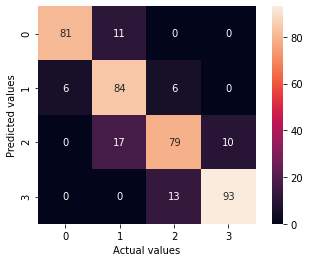

In [21]:
from sklearn.metrics import confusion_matrix
confusion_dt=confusion_matrix(Y_test,Y_pred)

#confusion matrix plot
plot=sb.heatmap(confusion_dt,square=True,annot=True)
class_lables=['0','1','2','3']
plot.set_xlabel('Actual values')
plot.set_ylabel('Predicted values')

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, hamming_loss, balanced_accuracy_score, cohen_kappa_score, explained_variance_score, r2_score, mean_absolute_error
Accuracy_dt=accuracy_score(Y_test,Y_pred)
Precision_dt=precision_score(Y_test,Y_pred,average='weighted')
Recall_dt=recall_score(Y_test,Y_pred,average='weighted')
f1_score_dt=f1_score(Y_test,Y_pred, average='weighted')
fbeta_score_dt= fbeta_score(Y_test,Y_pred, average='weighted', beta=0.5)
hamming_loss_dt= hamming_loss(Y_test,Y_pred)
balanced_accuracy_score_dt= balanced_accuracy_score(Y_test,Y_pred)
cohen_kappa_score_dt= cohen_kappa_score(Y_test,Y_pred)
explained_variance_score_dt= explained_variance_score(Y_test,Y_pred, multioutput='variance_weighted')
r2_score_dt= r2_score(Y_test,Y_pred, multioutput='variance_weighted')
mean_absolute_error_dt= mean_absolute_error(Y_test,Y_pred)

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
print(f'Cross Validation Scores: ' + str(cross_val_score(dt, X_train,Y_train, cv=5)))

print(f'Cross Validation Score (Mean): ' + str(np.mean(cross_val_score(dt, X_train,Y_train, cv=5))))

Cross Validation Scores: [0.803125 0.8      0.846875 0.85     0.83125 ]
Cross Validation Score (Mean): 0.828125


In [24]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2', 'class 3']
print(classification_report(Y_test,Y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.93      0.88      0.91        92
     class 1       0.75      0.88      0.81        96
     class 2       0.81      0.75      0.77       106
     class 3       0.90      0.88      0.89       106

    accuracy                           0.84       400
   macro avg       0.85      0.84      0.84       400
weighted avg       0.85      0.84      0.84       400



In [35]:
from sklearn.datasets import make_classification

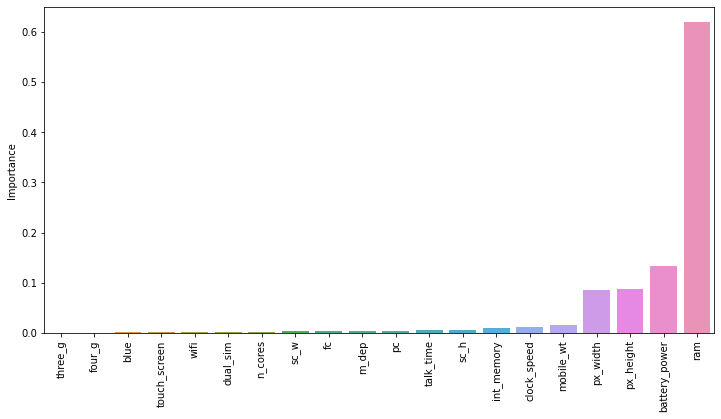

In [36]:
feats = pd.DataFrame(index=X.columns,data=dt.feature_importances_,columns=['Importance'])
imp_feats = feats.sort_values("Importance")
plt.figure(figsize=(12,6))
sb.barplot(data=imp_feats.sort_values('Importance'), x=imp_feats.sort_values('Importance').index, y='Importance')

plt.xticks(rotation=90);

# 2) KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [40]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [41]:
Y_pred_knn=knn.predict(X_test)

In [42]:
Y_pred_knn

array([0, 0, 1, 0, 3, 2, 1, 2, 2, 3, 0, 3, 1, 1, 3, 0, 0, 1, 1, 1, 3, 3,
       1, 2, 3, 2, 2, 3, 2, 2, 2, 1, 3, 0, 3, 3, 0, 0, 0, 1, 1, 1, 2, 1,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 3, 1, 3, 1, 3, 3, 1, 0, 2, 0, 3, 2, 1,
       0, 2, 3, 2, 1, 1, 0, 3, 3, 1, 2, 1, 0, 0, 0, 3, 1, 2, 3, 2, 2, 1,
       1, 1, 3, 0, 1, 1, 2, 2, 3, 0, 2, 3, 3, 2, 0, 1, 2, 0, 0, 1, 0, 2,
       0, 3, 1, 1, 2, 2, 3, 1, 1, 1, 1, 0, 0, 0, 3, 0, 1, 1, 0, 1, 0, 3,
       0, 3, 3, 0, 3, 2, 2, 1, 0, 0, 3, 1, 0, 2, 0, 0, 0, 1, 2, 3, 2, 1,
       0, 2, 1, 0, 3, 2, 3, 1, 2, 2, 3, 1, 2, 2, 3, 2, 2, 0, 2, 2, 0, 3,
       3, 0, 1, 3, 0, 3, 1, 0, 2, 3, 3, 1, 2, 1, 2, 2, 2, 3, 0, 1, 2, 3,
       3, 1, 3, 2, 0, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 0, 2, 0, 2, 0, 2, 1,
       0, 1, 2, 1, 3, 3, 0, 3, 2, 1, 0, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 2,
       2, 2, 0, 1, 2, 0, 3, 3, 3, 1, 2, 1, 0, 1, 1, 3, 2, 0, 3, 1, 1, 1,
       2, 1, 2, 0, 3, 2, 2, 0, 0, 1, 3, 3, 0, 1, 1, 2, 3, 2, 2, 2, 2, 0,
       0, 3, 0, 0, 1, 3, 2, 3, 0, 0, 2, 2, 3, 3, 2,

In [43]:
knn_ac=accuracy_score(Y_test,Y_pred_knn)

In [44]:
knn_ac

0.9125

Text(83.40000000000006, 0.5, 'Predicted values')

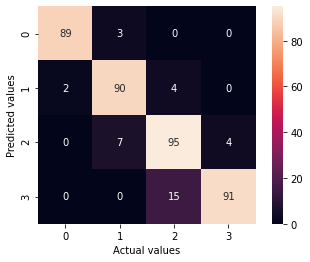

In [45]:
from sklearn.metrics import confusion_matrix
confusion_knn=confusion_matrix(Y_test,Y_pred_knn)
#confusion matrix plot
plot=sb.heatmap(confusion_knn,square=True,annot=True)
class_lables=['0','1','2','3']
plot.set_xlabel('Actual values')
plot.set_ylabel('Predicted values')

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, hamming_loss, balanced_accuracy_score, cohen_kappa_score, explained_variance_score, r2_score, mean_absolute_error
Accuracy_knn=accuracy_score(Y_test,Y_pred_knn)
Precision_knn=precision_score(Y_test,Y_pred_knn,average='weighted')
Recall_knn=recall_score(Y_test,Y_pred_knn,average='weighted')
f1_score_knn=f1_score(Y_test,Y_pred, average='weighted')
fbeta_score_knn= fbeta_score(Y_test,Y_pred, average='weighted', beta=0.5)
hamming_loss_knn= hamming_loss(Y_test,Y_pred)
balanced_accuracy_score_knn= balanced_accuracy_score(Y_test,Y_pred)
cohen_kappa_score_knn= cohen_kappa_score(Y_test,Y_pred)
explained_variance_score_knn= explained_variance_score(Y_test,Y_pred, multioutput='variance_weighted')
r2_score_knn= r2_score(Y_test,Y_pred, multioutput='variance_weighted')
mean_absolute_error_knn= mean_absolute_error(Y_test,Y_pred)

In [ ]:
print(f'Cross Validation Scores: ' + str(cross_val_score(knn, X_train,Y_train, cv=5)))

print(f'Cross Validation Score (Mean): ' + str(np.mean(cross_val_score(knn, X_train,Y_train, cv=5))))

Cross Validation Scores: [0.940625 0.9125   0.9375   0.90625  0.9125  ]
Cross Validation Score (Mean): 0.921875


# 3) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [ ]:
lr.fit(X_train,Y_train)

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
Y_pred_lr=lr.predict(X_test)

In [ ]:
Y_pred_lr

array([0, 0, 2, 0, 2, 1, 1, 3, 2, 3, 0, 3, 1, 1, 3, 0, 1, 3, 1, 2, 3, 3,
       1, 2, 3, 1, 3, 3, 3, 2, 2, 0, 3, 0, 3, 3, 1, 0, 1, 0, 2, 0, 2, 1,
       0, 0, 3, 2, 3, 3, 1, 3, 1, 3, 2, 3, 2, 2, 3, 1, 0, 1, 1, 2, 2, 2,
       1, 2, 2, 3, 2, 3, 0, 3, 3, 0, 1, 1, 0, 0, 0, 3, 1, 3, 3, 3, 3, 0,
       1, 0, 3, 0, 1, 2, 1, 3, 3, 0, 3, 2, 3, 3, 1, 1, 3, 0, 1, 1, 0, 2,
       1, 3, 2, 1, 2, 2, 3, 1, 2, 1, 2, 0, 0, 0, 3, 0, 1, 0, 2, 1, 0, 2,
       0, 3, 2, 0, 3, 3, 1, 1, 0, 0, 2, 1, 0, 3, 0, 1, 0, 1, 3, 3, 1, 1,
       0, 1, 1, 1, 2, 2, 2, 1, 3, 2, 3, 2, 2, 1, 3, 3, 2, 0, 3, 1, 0, 3,
       3, 0, 1, 3, 1, 3, 0, 0, 2, 2, 2, 0, 2, 2, 1, 2, 1, 2, 0, 1, 2, 3,
       3, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 1, 0, 3, 1, 0, 3, 0, 1, 0, 3, 1,
       0, 1, 3, 1, 3, 3, 0, 3, 1, 1, 2, 2, 3, 3, 2, 2, 1, 1, 3, 1, 3, 3,
       3, 3, 0, 0, 2, 0, 2, 3, 2, 0, 2, 3, 1, 3, 1, 3, 2, 0, 3, 1, 1, 2,
       2, 1, 3, 0, 3, 1, 1, 1, 0, 2, 2, 2, 1, 1, 0, 3, 2, 3, 1, 3, 2, 0,
       0, 3, 0, 0, 2, 2, 1, 3, 0, 1, 1, 2, 3, 2, 1,

In [ ]:
lr_ac=accuracy_score(Y_test,Y_pred_lr)

In [ ]:
lr_ac

0.615

Text(83.40000000000006, 0.5, 'Predicted values')

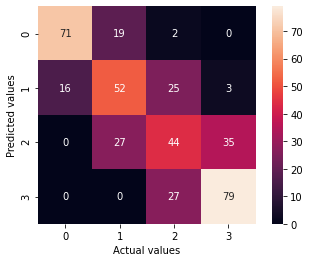

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_lr=confusion_matrix(Y_test,Y_pred_lr)
#confusion matrix plot
plot=sb.heatmap(confusion_lr,square=True,annot=True)
class_lables=['0','1','2','3']
plot.set_xlabel('Actual values')
plot.set_ylabel('Predicted values')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, hamming_loss, balanced_accuracy_score, cohen_kappa_score, explained_variance_score, r2_score, mean_absolute_error
Accuracy_lr=accuracy_score(Y_test,Y_pred_lr)
Precision_lr=precision_score(Y_test,Y_pred_lr,average='weighted')
Recall_lr=recall_score(Y_test,Y_pred_lr,average='weighted')
f1_score_lr=f1_score(Y_test,Y_pred, average='weighted')
fbeta_score_lr= fbeta_score(Y_test,Y_pred, average='weighted', beta=0.5)
hamming_loss_lr= hamming_loss(Y_test,Y_pred)
balanced_accuracy_score_lr= balanced_accuracy_score(Y_test,Y_pred)
cohen_kappa_score_lr= cohen_kappa_score(Y_test,Y_pred)
explained_variance_score_lr= explained_variance_score(Y_test,Y_pred, multioutput='variance_weighted')
r2_score_lr= r2_score(Y_test,Y_pred, multioutput='variance_weighted')
mean_absolute_error_lr= mean_absolute_error(Y_test,Y_pred)

In [ ]:
print(f'Cross Validation Scores: ' + str(cross_val_score(lr, X_train,Y_train, cv=5)))

print(f'Cross Validation Score (Mean): ' + str(np.mean(cross_val_score(lr, X_train,Y_train, cv=5))))

Cross Validation Scores: [0.671875 0.628125 0.65625  0.65     0.615625]
Cross Validation Score (Mean): 0.644375


# 4) Random forest model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
model = RandomForestRegressor() 
hyp = RandomizedSearchCV(estimator = model, param_distributions=grid, n_iter=10, scoring= 'neg_mean_squared_error', 
                         cv=5,verbose = 2, random_state = 42 ,n_jobs = 1) 
hyp.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
y_pred = hyp.predict(X_test)
y_pred

array([5.20535714e-03, 4.76265176e-01, 1.00651278e+00, 9.39866522e-02,
       2.59543322e+00, 1.39269323e+00, 6.46939827e-01, 2.11768354e+00,
       2.02254076e+00, 2.99040720e+00, 4.89948593e-02, 3.00000000e+00,
       1.02187685e+00, 9.33936247e-01, 2.89503105e+00, 5.68173701e-02,
       9.17847361e-02, 1.05943751e+00, 1.02515991e+00, 1.68362680e+00,
       3.00000000e+00, 2.94622157e+00, 7.03349401e-01, 1.87911223e+00,
       2.99744192e+00, 1.81031395e+00, 1.90939919e+00, 2.44156587e+00,
       1.91092023e+00, 2.07010052e+00, 1.84057893e+00, 8.66734398e-01,
       2.46649366e+00, 1.10913878e-02, 3.00000000e+00, 2.93933125e+00,
       8.19224456e-02, 6.78571429e-03, 5.04241490e-01, 4.43682092e-01,
       1.53584738e+00, 2.87913632e-01, 2.42364589e+00, 1.40670641e+00,
       4.16666667e-04, 8.93087531e-01, 2.23764926e+00, 2.01342142e+00,
       1.08226531e+00, 2.07085804e+00, 1.43877599e+00, 2.81529559e+00,
       1.10602089e+00, 2.99649405e+00, 1.45114668e+00, 2.99517857e+00,
      

Text(83.40000000000006, 0.5, 'Predicted values')

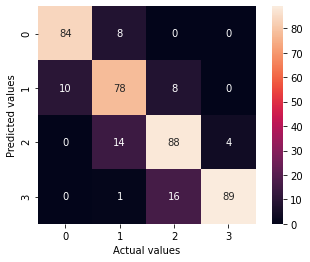

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_rf=confusion_matrix(Y_test,y_pred_rf)
#confusion matrix plot
plot=sb.heatmap(confusion_rf,square=True,annot=True)
class_lables=['0','1','2','3']
plot.set_xlabel('Actual values')
plot.set_ylabel('Predicted values')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, hamming_loss, balanced_accuracy_score, cohen_kappa_score, explained_variance_score, r2_score, mean_absolute_error
Accuracy_rf=accuracy_score(Y_test,y_pred_rf)
Precision_rf=precision_score(Y_test,y_pred_rf,average='weighted')
Recall_rf=recall_score(Y_test,y_pred_rf,average='weighted')
f1_score_rf=f1_score(Y_test,Y_pred, average='weighted')
fbeta_score_rf= fbeta_score(Y_test,Y_pred, average='weighted', beta=0.5)
hamming_loss_rf= hamming_loss(Y_test,Y_pred)
balanced_accuracy_score_rf= balanced_accuracy_score(Y_test,Y_pred)
cohen_kappa_score_rf= cohen_kappa_score(Y_test,Y_pred)
explained_variance_score_rf= explained_variance_score(Y_test,Y_pred, multioutput='variance_weighted')
r2_score_rf= r2_score(Y_test,Y_pred, multioutput='variance_weighted')
mean_absolute_error_rf= mean_absolute_error(Y_test,Y_pred)

In [ ]:
rf_ac=accuracy_score(Y_test,y_pred_rf)

In [ ]:
rf_ac

0.8475

In [ ]:
print(f'Cross Validation Scores: ' + str(cross_val_score(hyp, X_train,Y_train, cv=5)))

print(f'Cross Validation Score (Mean): ' + str(np.mean(cross_val_score(hyp, X_train,Y_train, cv=5))))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

# Graphical View (comparision of model)

In [ ]:
models=pd.DataFrame({'Model':["Decision Tree","KNN","Logistic Regression","Random forest"],
                     'Accuracy':[Accuracy_dt,Accuracy_knn,Accuracy_lr,Accuracy_rf],
                    "precision":[Precision_dt,Precision_knn,Precision_lr,Precision_rf],
                    'Recall':[Recall_dt,Recall_knn,Recall_lr,Recall_rf],
                    "f1_score":[f1_score_dt,f1_score_knn,f1_score_lr,f1_score_rf],
                    "fbeta_score":[fbeta_score_dt, fbeta_score_knn, fbeta_score_lr, fbeta_score_rf],
                    "hamming_loss":[hamming_loss_dt,hamming_loss_knn,hamming_loss_lr,hamming_loss_rf],
                    "r2_score":[r2_score_dt,r2_score_knn,r2_score_lr,r2_score_rf],
                    "balanced_accuracy_score":[balanced_accuracy_score_dt,balanced_accuracy_score_knn,balanced_accuracy_score_lr,balanced_accuracy_score_rf],
                    "cohen_kappa_score":[cohen_kappa_score_dt,cohen_kappa_score_knn,cohen_kappa_score_lr,cohen_kappa_score_rf],
                    "explained_variance_score":[explained_variance_score_dt,explained_variance_score_knn,explained_variance_score_lr,explained_variance_score_rf],
                    "mean_absolute_error":[mean_absolute_error_dt,mean_absolute_error_knn,mean_absolute_error_lr,mean_absolute_error_rf]})
                   
models

Model  Accuracy  precision  Recall  f1_score  fbeta_score  \
0        Decision Tree    0.8475   0.852647  0.8475  0.847854     0.850227   
1                  KNN    0.9125   0.915620  0.9125  0.847854     0.850227   
2  Logistic Regression    0.6150   0.612959  0.6150  0.847854     0.850227   
3        Random forest    0.8475   0.852695  0.8475  0.847854     0.850227   

   hamming_loss  r2_score  balanced_accuracy_score  cohen_kappa_score  \
0        0.1525  0.876596                   0.8502           0.796667   
1        0.1525  0.876596                   0.8502           0.796667   
2        0.1525  0.876596                   0.8502           0.796667   
3        0.1525  0.876596                   0.8502           0.796667   

   explained_variance_score  mean_absolute_error  
0                  0.878421               0.1525  
1                  0.878421               0.1525  
2                  0.878421               0.1525  
3                  0.878421               0.1525

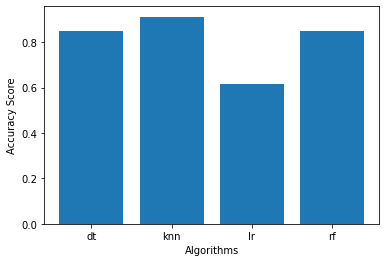

In [ ]:
plt.bar(x=['dt','knn','lr','rf'],height=[dt_ac,knn_ac,lr_ac,rf_ac])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.show()

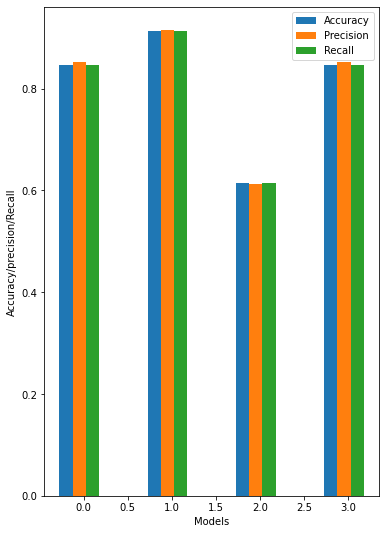

In [ ]:
accuracy=models['Accuracy'].values
precision=models['precision'].values
Recall=models['Recall'].values
model=["Decision Tree","KNN","Logistic Regression","Random forest"]

x_axis=np.arange(len(model))
plt.figure(figsize=(6,9))
plt.bar(x_axis-0.2,accuracy,width=0.15,label="Accuracy")
plt.bar(x_axis-0.05,precision,width=0.15,label="Precision")
plt.bar(x_axis+0.1,Recall,width=0.15,label="Recall")
plt.xlabel("Models")
plt.ylabel("Accuracy/precision/Recall")
plt.legend()
plt.show()

# KNN classifier got highest accuracy
# Logistic Regression classifier got lowest accuracy